## Estimate healthcare costs based on patient demographics, lifestyle, and medical history using regression techniques.

IMPORTING THE NECESSARY LIBARARIES FOR OUR REGRESSION MODEL ANALYSIS

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot


IMPORTING THE DATA SET ON WHICH WE WILL PERFROM THE ANALYSIS 

In [2]:
df = pd.read_csv("./insurance.csv");
print(df)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


GATHERING INFORMATION ABOUT THE DATAFRAME 

In [3]:
df.shape

(1338, 7)

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


CHECKING FOR MISSING VALUE

In [7]:
df.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [8]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# VISUALISING THE DATAFRAME USING THE HEATMAP

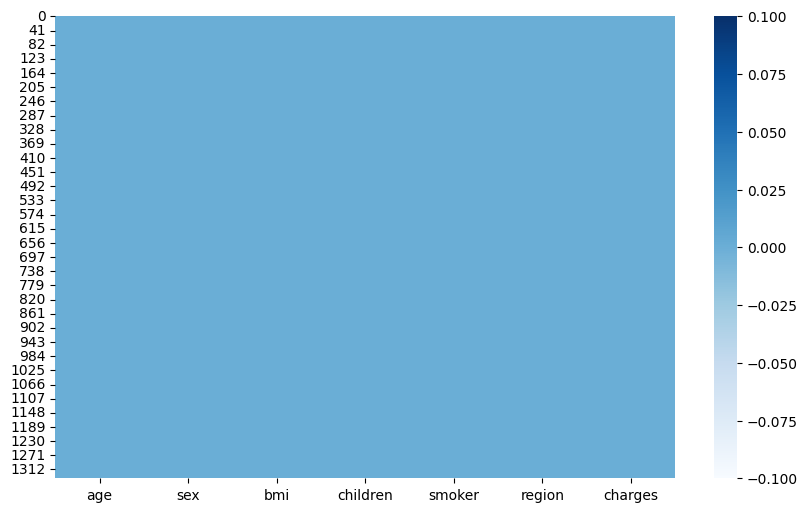

In [9]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(),cmap="Blues")
plt.show()

# EXPLORATORY DATA ANALYSIS

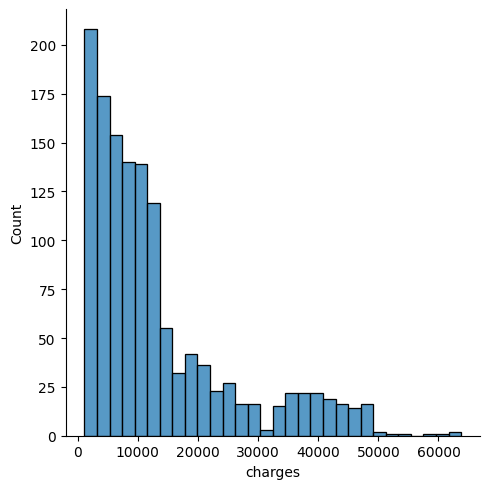

In [10]:
#WE CAN APPLY LOG TRANSFORM TO CORREST SKEWNESS

skewed = sns.displot(df['charges']) #Charges is right-skewed
skewed

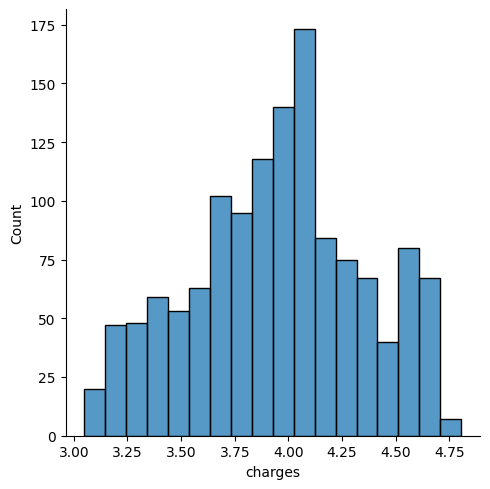

In [11]:
log_trans = sns.displot(np.log10(df['charges'])) #skewness is corrected using log
log_trans

In [12]:
charges = df['charges'].groupby(df['region']).sum().sort_values(ascending = True)
charges

region
southwest    4.012755e+06
northwest    4.035712e+06
northeast    4.343669e+06
southeast    5.363690e+06
Name: charges, dtype: float64

In [13]:
# Ploting charges by region with plotly.express aka px

fig = px.bar(charges, title='Charges by Region', color=charges, color_continuous_scale='plasma')
fig.update_layout(
    margin=dict(t=50, b=0, l=0, r=0),
    titlefont=dict(size=20)
)
fig.update_yaxes(
    showticklabels=False, title=' ')
fig.update_xaxes(title=' ')
fig.update_traces(
    texttemplate='%{y}',  # Display y values as text on the bars
    textposition='outside',  # Position the text outside the bars
)


<Axes: xlabel='region', ylabel='charges'>

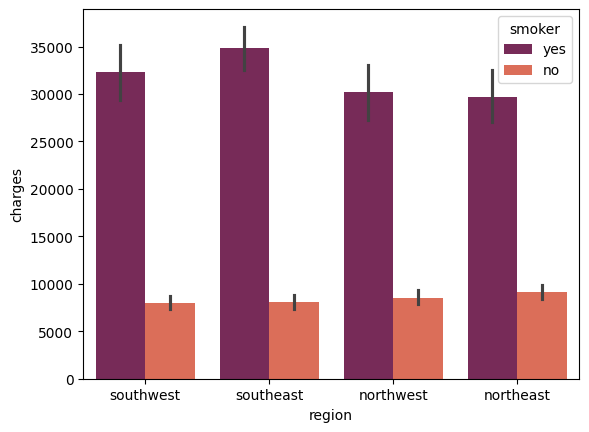

In [14]:
#WE CHECK THE CHARGES BY REGION WHO ARE SMOKERS

sns.barplot(data = df, x = 'region', y = 'charges', hue = 'smoker', palette = 'rocket' )

<Axes: xlabel='region', ylabel='charges'>

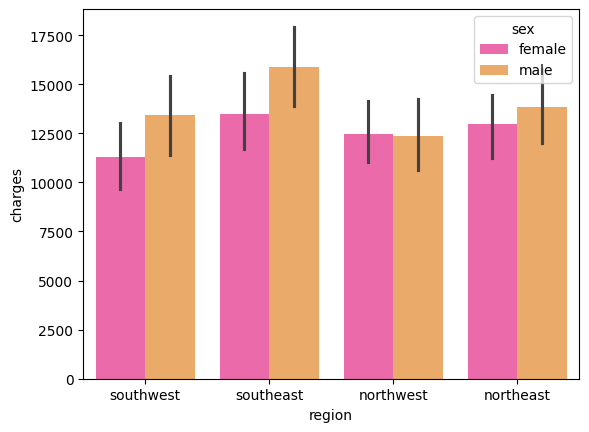

In [15]:
#WE CHECK THE CHARGES BY REGION BY THIER GENDER
sns.barplot(data = df, x='region', y='charges', hue='sex', palette='spring')

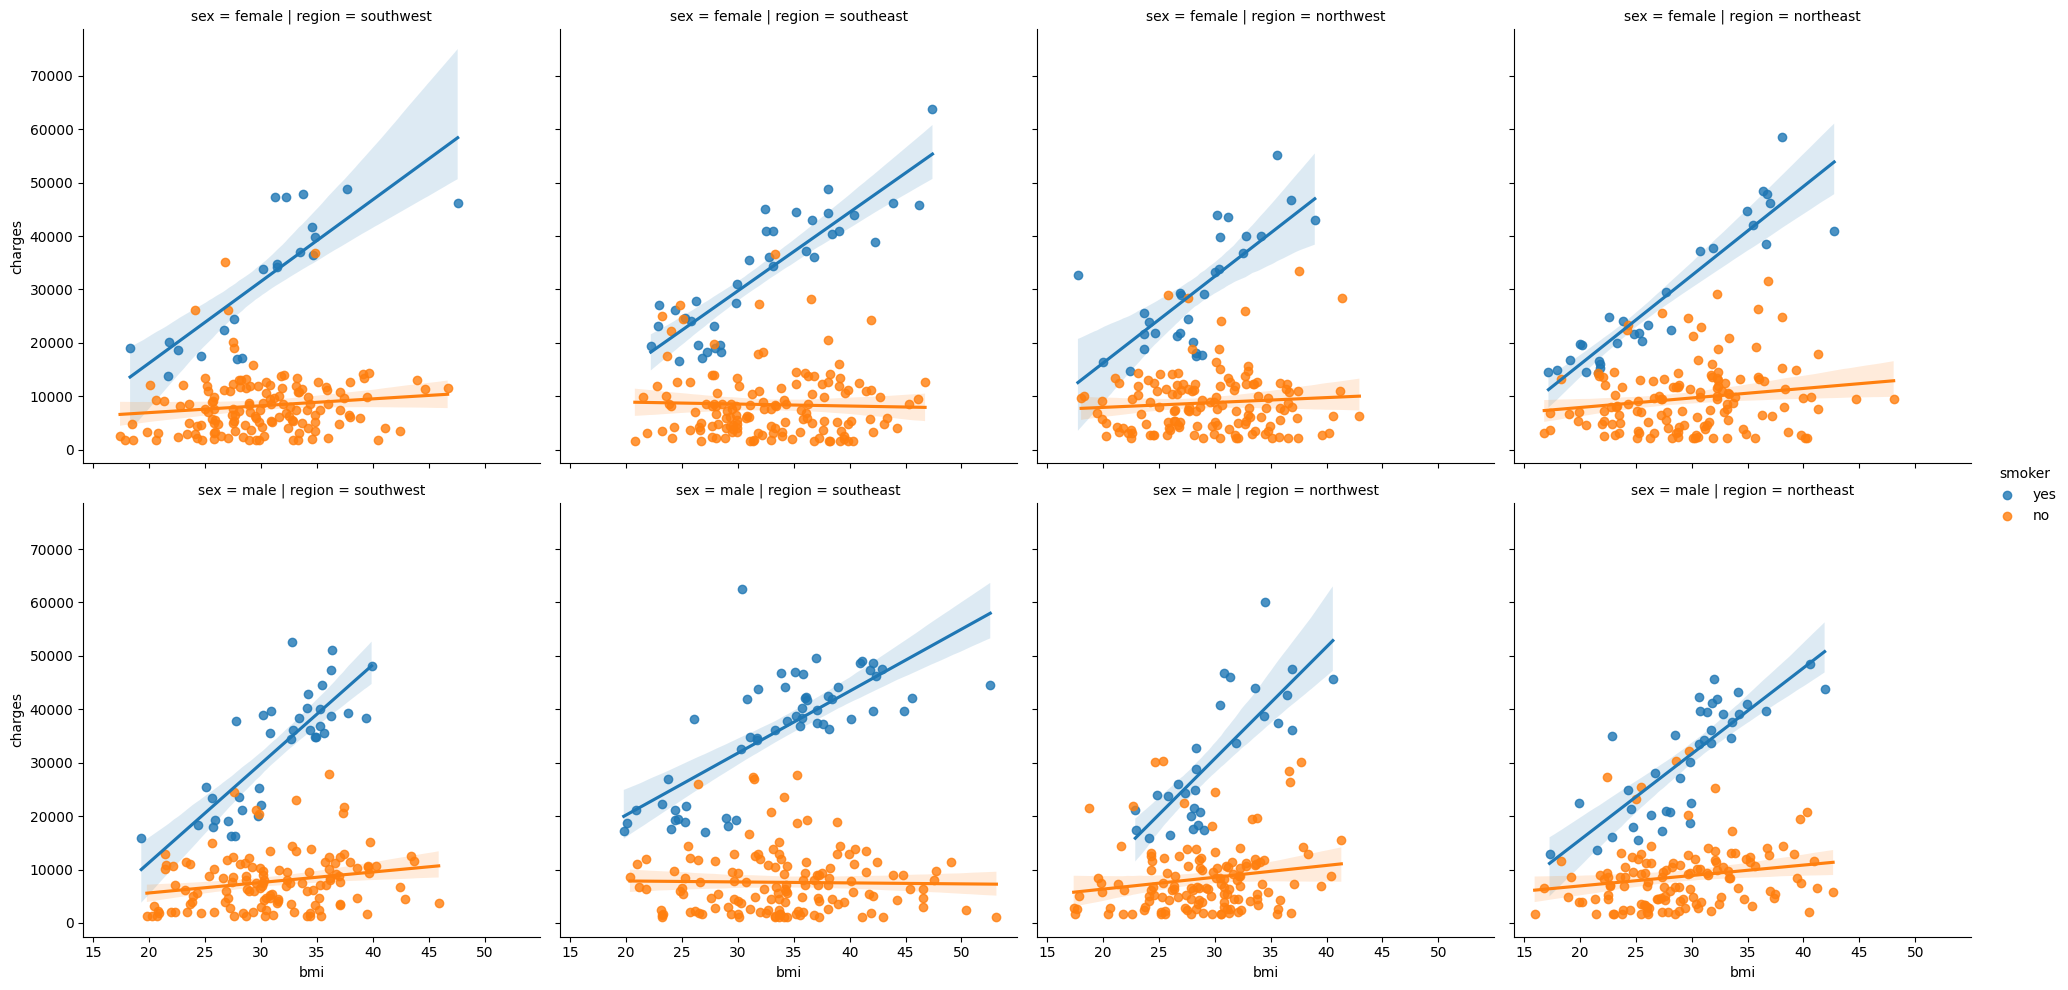

In [16]:
#regression plot to understand the relationship between the bmi and charges considering
sns.lmplot(x = "bmi", y = "charges", row = "sex", col = "region", hue = 'smoker', data = df)

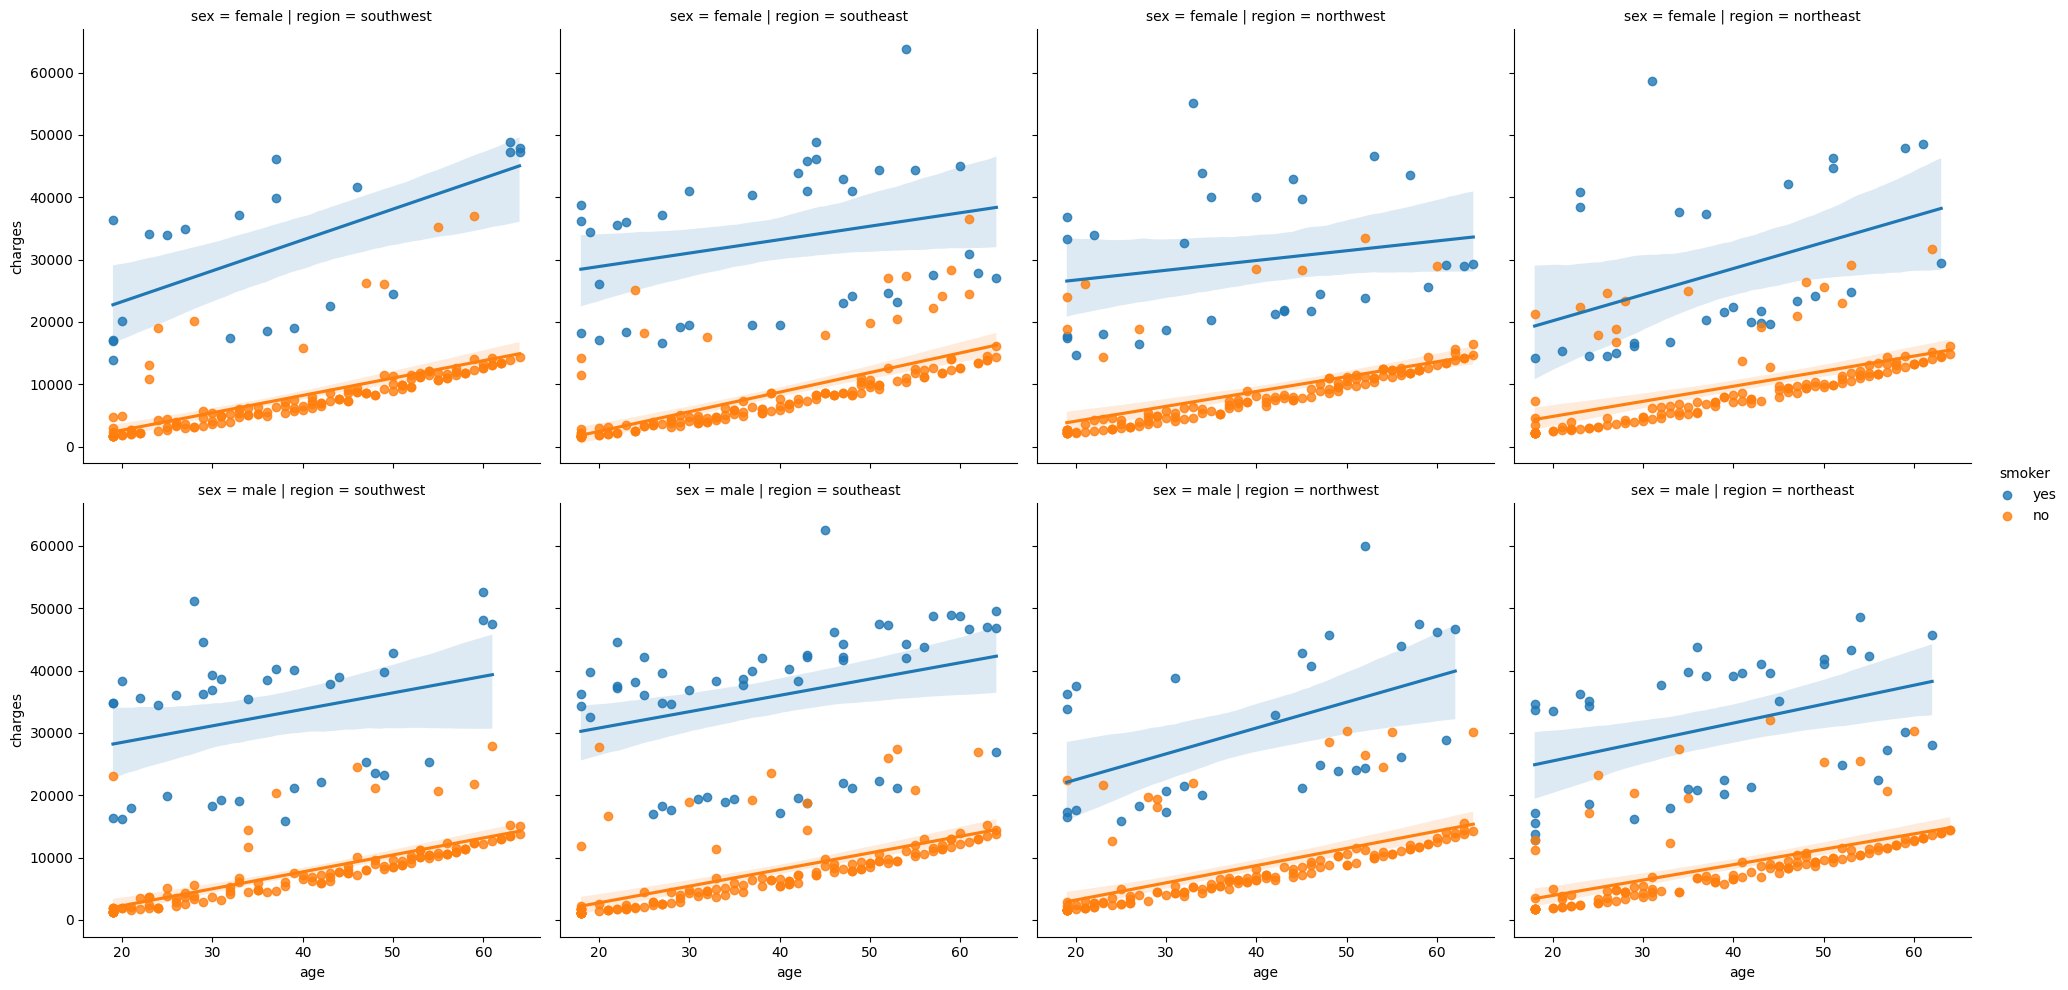

In [17]:
#regression plot to understand the relationship between the Age and Charges considering
sns.lmplot(x = "age", y = "charges", row = "sex", col = "region", hue = 'smoker', data = df)

In [18]:
# Convert object labels to categorical data type
df[['sex', 'region', 'smoker']] = df[['sex', 'region', 'smoker']].astype('category')

# Check the updated data types
print(df.dtypes)

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object


In [19]:
# Converting category labels into numerical using LabelEncoder
from sklearn import preprocessing
label = preprocessing.LabelEncoder()

label.fit(df.sex.drop_duplicates())
df.sex = label.transform(df.sex)

label.fit(df.smoker.drop_duplicates())
df.smoker = label.transform(df.smoker)

label.fit(df.region.drop_duplicates())
df.region = label.transform(df.region)

In [20]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


<Axes: >

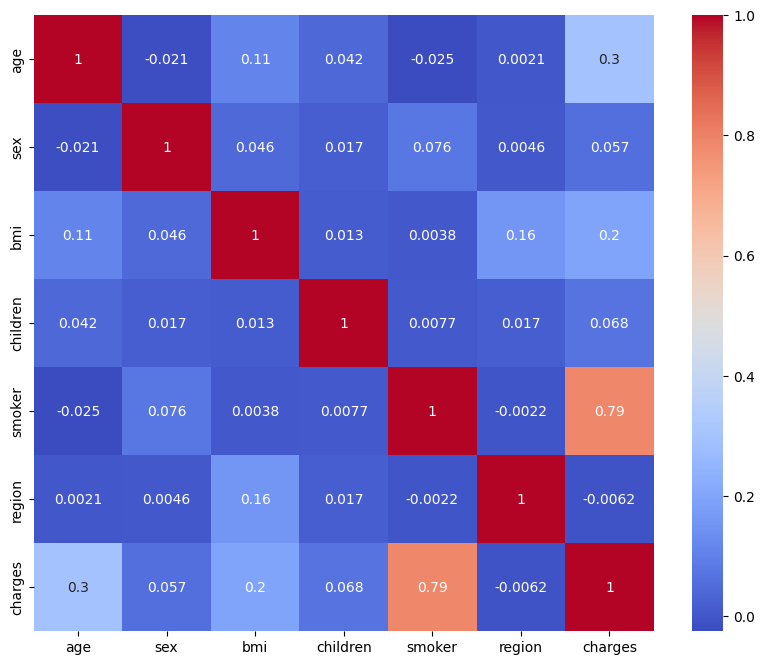

In [21]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

In [22]:
#we split our model
x = df.drop(['charges'], axis = 1)
y = df['charges']

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [26]:
import statsmodels.api as sm #WE GET THE STATISTICAL MODEL
#add constant to predictor variables
x2 = sm.add_constant(x_train)
#fit linear regression model
model = sm.OLS(y_train, x2).fit()

In [27]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     508.7
Date:                Sat, 16 Mar 2024   Prob (F-statistic):          2.71e-308
Time:                        00:14:49   Log-Likelihood:                -10845.
No. Observations:                1070   AIC:                         2.170e+04
Df Residuals:                    1063   BIC:                         2.174e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.195e+04   1086.938    -10.991      0.000   -1.41e+04   -9813.820
age          257.0563     13.452     19.109      0.000     230.661     283.451
sex          -18.7915    375.770     -0.050      0.960    -756.126     718.543
bmi          335.7815     31.655     10.607      0.000     273.668     397.895
children     425.0915    154.431      2.753      0.006     122.067     728.116
smoker      2.365e+04    465.245     50.829      0.000    2.27e+04    2.46e+04
region      -271.2843    170.373     -1.592      0.112    -605.590      63.022
==============================================================================
Omnibus:                      251.823   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              611.548
Skew:                           1.251   Prob(JB):                    1.60e-133
Kurtosis:                       5.731   Cond. No.                         299.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Standard Errors:

[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.


R-squared: 0.747


The coefficient of determination.


Proportion of variance in the response variable explained by predictor variables.


74.7% of the variation in exam scores explained by hours studied and prep exams taken.


F-statistic: 523.6


Overall F-statistic for the regression model.


Prob (F-statistic): 3.16e-313


p-value associated with the overall F-statistic.


Determines if the regression model is statistically significant.


p-value < 0.05 indicates a significant association of predictor variables with the response variable.


coef:


Coefficients for each predictor variable.


Represents average expected change in the response variable, with other predictors constant.


P>|t|:


Individual p-values for each predictor variable.


Indicates statistical significance.


Statistically significant at α < 0.05, not significant at α >= 0.05.


Example: "sex" not statistically significant, may be removed from the model.

In [28]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

In [29]:
lm.fit(x_train,y_train)

LinearRegression()

In [30]:
print('Intercept', lm.intercept_)
print('Coefficient', lm.coef_)
print('Score', lm.score(x_test, y_test))

Intercept -11946.606567263034
Coefficient [ 2.57056264e+02 -1.87914567e+01  3.35781491e+02  4.25091456e+02
  2.36478181e+04 -2.71284266e+02]
Score 0.7833463107364539


In [31]:
coeff_df = pd.DataFrame(lm.coef_,x.columns,columns=['Coefficient'])
coeff_df

,Coefficient
age,257.056264
sex,-18.791457
bmi,335.781491
children,425.091456
smoker,23647.818096
region,-271.284266


In [32]:
#WE PREDICT OUR MODEL
y_pred1 = lm.predict(x_test)

C:\Users\ygupt\AppData\Local\Temp\ipykernel_11368\1374094051.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\ygupt\AppData\Local\Temp\ipykernel_11368\1374094051.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




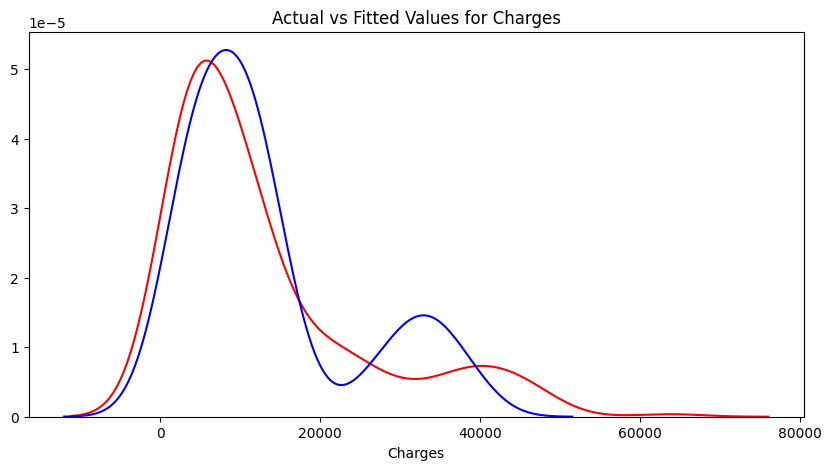

In [33]:
plt.figure(figsize=(10, 5))
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred1, hist=False, color="b", label="Fitted Values" , ax=ax1)
plt.title('Actual vs Fitted Values for Charges')
plt.xlabel('Charges')
plt.ylabel('')
plt.show()
plt.close()

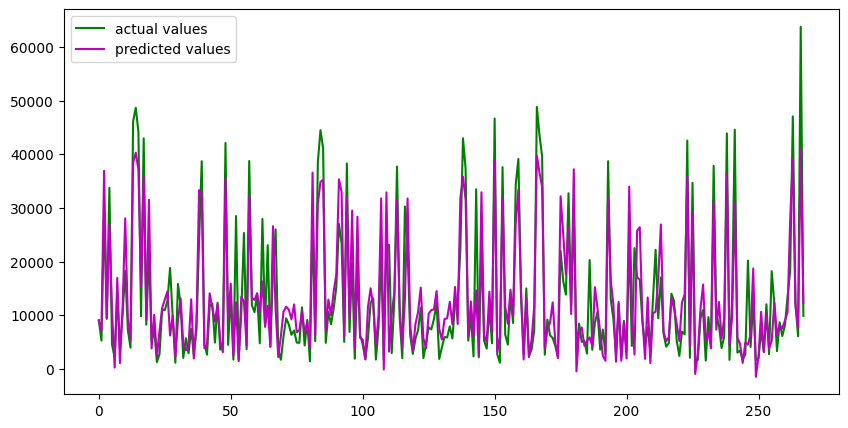

In [34]:
## ANOTHER PLOTTING TECHNIQUE

plt.figure(figsize=(10, 5))
# acutal values
plt.plot([i for i in range(len(y_test))],np.array(y_test), c='g', label="actual values")
# predicted values
plt.plot([i for i in range(len(y_test))],y_pred1, c='m',label="predicted values")
plt.legend()
plt.show()

In [35]:
#DATAFRAME FOR ACTUAL AND PREDICTED VALUE
predicted1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred1})
predicted1.head()

,Actual,Predicted
764,9095.06825,8924.407244
887,5272.17580,7116.295018
890,29330.98315,36909.013521
1293,9301.89355,9507.874691
259,33750.29180,27013.350008
